In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pickle

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['species'] = y

In [3]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


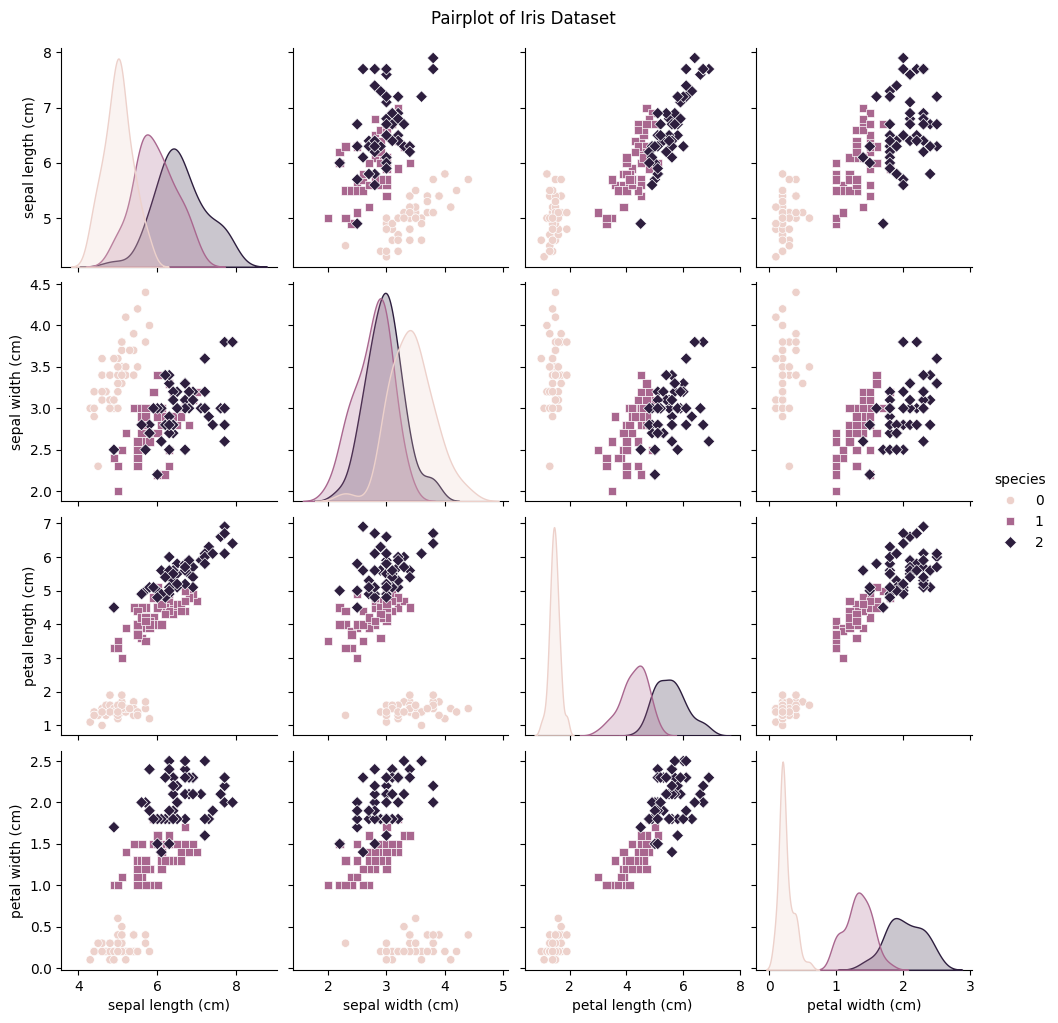

In [5]:
# Visualizations
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

Observations
- The pairplot shows a clear separation between the species, especially in the petal length and petal width dimensions. Setosa (species 0) is easily distinguishable from Versicolor (species 1) and Virginica (species 2).
- There is a strong positive correlation between petal length and petal width across all species, as shown by the clustered points along a line.
- There is some overlap between Versicolor and Virginica in the sepal dimensions, indicating that these features alone may not be sufficient for accurate classification.


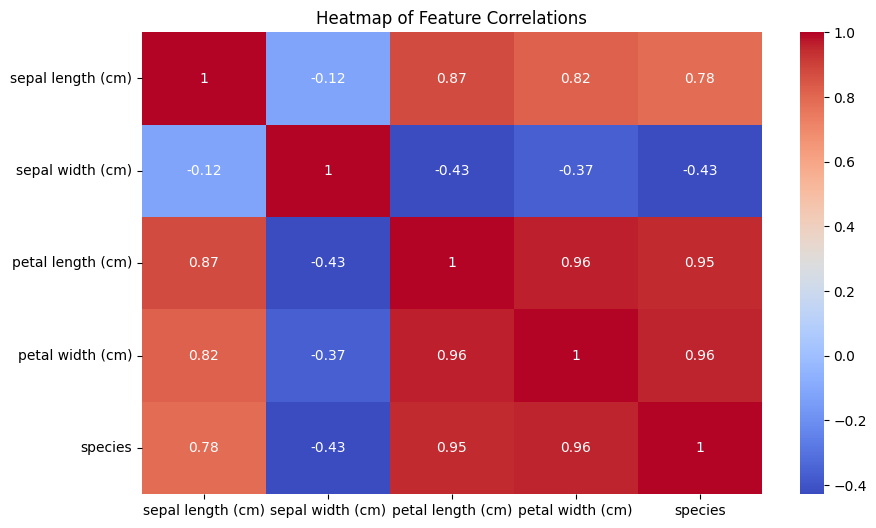

In [6]:
# Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(iris_df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap of Feature Correlations")
plt.show()

Observations
- Petal length and petal width have a very high correlation (0.96). This is also reflected in their strong correlation with the species.
- Sepal length is moderately correlated with petal length and petal width (0.87 and 0.82 respectively), while sepal width has weak to moderate correlations(negative) with these features.
- Petal dimensions (length and width) have the highest correlation with the species, indicating their importance in distinguishing between the species. 
- Sepal width has the lowest correlation with species, suggesting it is less informative for classification purposes.

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Standardizing features helps gradient descent converge faster by ensuring that all features contribute equally to the updates of the model parameters.
When features are on different scales, the feature with the larger range can dominate the gradient updates, leading to slow or unstable convergence.

Many machine learning algorithms, like logistic regression, k-nearest neighbors (KNN), and support vector machines (SVM), assume that the data is centered around zero and has equal variance.
Standardizing features ensures that the model treats all features equally, improving performance and accuracy.
When features are standardized, it becomes easier to interpret the learned weights of linear models since the scale of the features is uniform.

In [9]:
# Create and train the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [10]:
# Save the model to a file using pickle
with open('iris_logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [11]:
# Save the scaler to a file using pickle
with open('iris_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [12]:
# Function to classify a new sample
def classify_iris(sepal_length_cm, sepal_width_cm, petal_length_cm, petal_width_cm):
    sample = np.array([[sepal_length_cm, sepal_width_cm, petal_length_cm, petal_width_cm]])
    with open('iris_scaler.pkl', 'rb') as scaler_file:
        scaler = pickle.load(scaler_file)
    sample = scaler.transform(sample)
    with open('iris_logistic_regression_model.pkl', 'rb') as model_file:
        model = pickle.load(model_file)
    prediction = model.predict(sample)
    return iris.target_names[prediction][0]

In [13]:
# Test the function with a sample input
sample_input = [5.1, 3.5, 1.4, 0.2]
predicted_label = classify_iris(*sample_input)
print(f"The predicted label for the sample input {sample_input} is: {predicted_label}")

The predicted label for the sample input [5.1, 3.5, 1.4, 0.2] is: setosa


In [14]:
sample_input = [7.0, 3.2, 4.7, 1.4]
predicted_label = classify_iris(*sample_input)
print(f"The predicted label for the sample input {sample_input} is: {predicted_label}")

The predicted label for the sample input [7.0, 3.2, 4.7, 1.4] is: versicolor


In [15]:
# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Model accuracy on the test set: {accuracy * 100:.2f}%")

Model accuracy on the test set: 100.00%
